In [57]:
import numpy
import pandas
from matplotlib import pyplot, ticker

In [58]:
wavenumber = True
dynamic = True
num_contour = 16

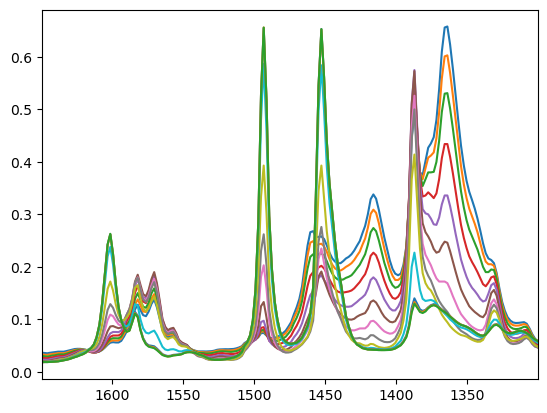

In [59]:
filename = "pskdt.csv"
data = pandas.read_csv(filename, header=0, index_col=0).T
data.index = pandas.read_csv(filename, header=None, index_col=0).iloc[0].values

xmin, xmax = 1300, 1650
tmin, tmax, tdiv, tminor = 1300, 1651, 50, 10

data = data.iloc[:, (xmin <= data.columns) & (data.columns <= xmax)]
pyplot.rcParams.update(pyplot.rcParamsDefault)
if wavenumber: data.T.plot(legend=None, xlim=[data.columns.max(), data.columns.min()])
else: data.T.plot(legend=None, xlim=[data.columns.min(), data.columns.max()])
pyplot.show()
if dynamic: dyna = data - data.mean()
else: dyna = data

In [60]:
pyplot.rcParams["figure.figsize"] = (4, 4)
pyplot.rcParams["font.size"] = 16
pyplot.rcParams["font.family"] = "Meiryo"
pyplot.rcParams["xtick.bottom"] = True
pyplot.rcParams["xtick.top"] = True
pyplot.rcParams["ytick.left"] = True
pyplot.rcParams["ytick.right"] = True
pyplot.rcParams["xtick.direction"] = "in"
pyplot.rcParams["ytick.direction"] = "in"
pyplot.rcParams["xtick.major.size"] = 10
pyplot.rcParams["ytick.major.size"] = 10
pyplot.rcParams["xtick.minor.size"] = 5
pyplot.rcParams["ytick.minor.size"] = 5
pyplot.rcParams["lines.linewidth"] = 2
pyplot.rcParams["axes.linewidth"] = 2
pyplot.rcParams["xtick.major.width"] = 2
pyplot.rcParams["ytick.major.width"] = 2
pyplot.rcParams["xtick.minor.width"] = 2
pyplot.rcParams["ytick.minor.width"] = 2
pyplot.rcParams["axes.labelpad"] = 8
pyplot.rcParams["xtick.major.pad"] = 10
pyplot.rcParams["ytick.major.pad"] = 5
pyplot.rcParams["axes.titlepad"] = 10

pyplot.rcParams["savefig.format"] = "png"
pyplot.rcParams["savefig.dpi"] = 150
pyplot.rcParams["savefig.transparent"] = False
pyplot.rcParams["savefig.facecolor"] = "white"
pyplot.rcParams["savefig.bbox"] = "tight"

In [61]:
def contour(cont, title, fname):
	pyplot.rcParams["font.family"] = "Arial"
#	cont = cont.iloc[:, (1520 <= cont.columns) & (cont.columns <= 1650)]
	cont = cont.iloc[(1520 <= cont.index) & (cont.index <= 1650), :]

	x = cont.columns
	y = cont.index
	z = cont.values
	zmax = numpy.absolute(z).max()

	fig = pyplot.figure()
	ax1 = fig.add_axes((0.35, 0, 1, 1))
	ax1.set_axisbelow(False)
	pyplot.rcParams["lines.linewidth"] = 2
	ax1.contour(x, y, z, num_contour, cmap="bwr", vmin=-zmax, vmax=zmax)

	xmin, xmax = 1300, 1520
	tmin, tmax, tdiv, tminor = 1300, 1521, 50, 10

	ax1.set_xlim(xmax, xmin)
	ax1.set_xticks(numpy.arange(tmin, tmax, tdiv))
	ax1.xaxis.set_minor_locator(ticker.MultipleLocator(tminor))
	ax1.set_xlabel(r"$\nu$${_{1}}$ / cm${^{-1}}$")

	xmin, xmax = 1520, 1650
	tmin, tmax, tdiv, tminor = 1530, 1651, 30, 10

	ax1.set_ylim(xmax, xmin)
	ax1.set_yticks(numpy.arange(tmin, tmax, tdiv))
	ax1.yaxis.set_minor_locator(ticker.MultipleLocator(tminor))
	ax1.axes.yaxis.set_ticklabels([])
	ax1 = ax1.twinx()
	ax1.set_ylim(xmax, xmin)
	ax1.set_yticks(numpy.arange(tmin, tmax, tdiv))
	ax1.yaxis.set_minor_locator(ticker.MultipleLocator(tminor))
	ax1.set_ylabel(r"$\nu$${_{2}}$ / cm${^{-1}}$")

	ax2 = fig.add_axes((0, 0, 0.35, 1))
	ax2.set_axisbelow(False)
	pyplot.rcParams["lines.linewidth"] = 0.5
	for i in range(len(data)): ax2.plot(-data.iloc[i], data.columns, color="gray")
	pyplot.rcParams["lines.linewidth"] = 1.5
	ax2.plot(-data.iloc[0], data.columns, color="blue")
	ax2.plot(-data.iloc[-1], data.columns, color="red")

	xmin, xmax = 1520, 1650
	tmin, tmax, tdiv, tminor = 1530, 1651, 30, 10

	ax2.set_ylim(xmax, xmin)
	ax2.set_yticks(numpy.arange(tmin, tmax, tdiv))
	ax2.yaxis.set_minor_locator(ticker.MultipleLocator(tminor))
	ax2.axes.yaxis.set_ticks([])
	ax2.axes.xaxis.set_ticks([])
  
	pyplot.rcParams["font.family"] = "Meiryo"
	ax3 = fig.add_axes((0.35, 1, 1, 0.35))
	ax3.set_axisbelow(False)
	pyplot.rcParams["lines.linewidth"] = 0.5
	for i in range(len(data)): ax3.plot(data.columns, data.iloc[i], color="gray")
	pyplot.rcParams["lines.linewidth"] = 1.5
	ax3.plot(data.columns, data.iloc[0], color="blue")
	ax3.plot(data.columns, data.iloc[-1], color="red")

	xmin, xmax = 1300, 1520
	tmin, tmax, tdiv, tminor = 1300, 1521, 50, 10

	ax3.set_xlim(xmax, xmin)
	ax3.set_xticks(numpy.arange(tmin, tmax, tdiv))
	ax3.xaxis.set_minor_locator(ticker.MultipleLocator(tminor))
	ax3.axes.xaxis.set_ticks([])
	ax3.axes.yaxis.set_ticks([])
	ax3.set_title(title, y=1.05)

	pyplot.savefig(fname)
	pyplot.show()

In [62]:
# Hilbert-Noda transformation matrix
noda = numpy.zeros([len(data), len(data)])
for i, j in numpy.ndindex(noda.shape):
	if i != j: noda[i, j] = 1 / numpy.pi / (j - i)

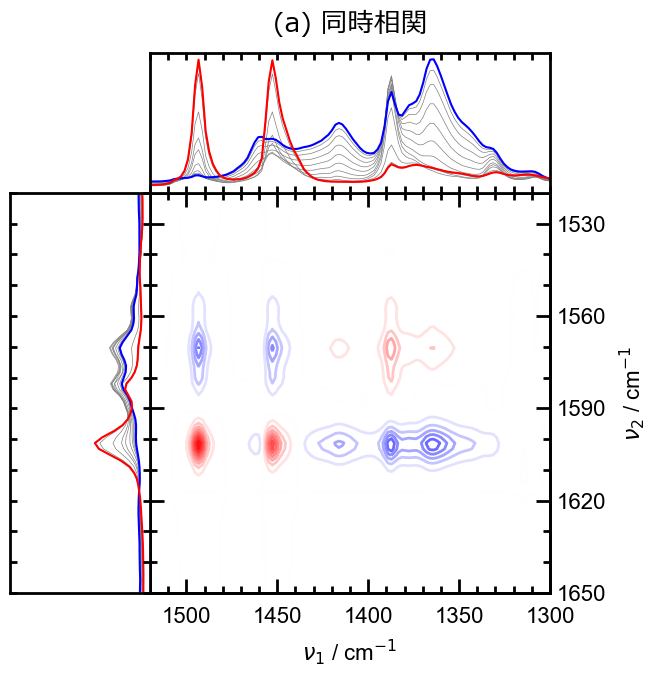

In [63]:
# synchronous correlation
sync = pandas.DataFrame(dyna.T.values @ dyna.values / (len(data) - 1), index=data.columns, columns=data.columns).T
contour(sync, "(a) 同時相関", "sync.png")
#sync.to_csv(filename[:-4] + "_sync.csv")

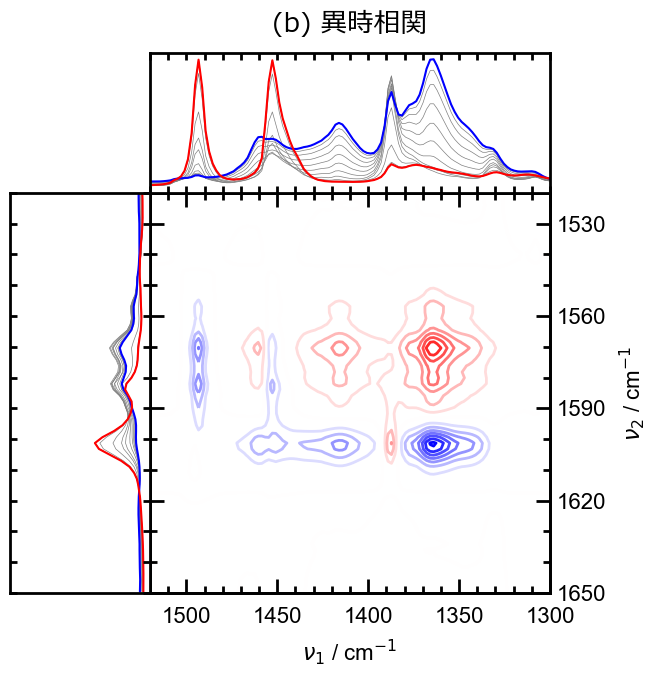

In [64]:
# asynchronouse correlation
asyn = pandas.DataFrame(dyna.T.values @ noda @ dyna.values / (len(data) - 1), index=data.columns, columns=data.columns).T
contour(asyn, "(b) 異時相関", "anyn.png")
#asyn.to_csv(filename[:-4] + "_asyn.csv")